In [ ]:
# https://1drv.ms/f/c/37720f927b6ddc34/EjTcbXuSD3IggDcSpgEAAAABdvyp2X2dUGQI2gO1hprDMA?e=3s9fNh4
# https://1drv.ms/o/s!BDTcbXuSD3I3htEPaYCGtpQIopHprQ?e=8PF2gkyrhE6Lnency_S-wA&at=9

In [ ]:
install.packages(c("ggplot2", "dplyr", "HSAUR", "ggcorrplot"))
# Load essential libraries
library(ggplot2)
library(dplyr)
library(HSAUR) # Lots of inbuilt to play around
library(ggcorrplot)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tools



Heptathon is an athletic event, in particular one for women, in which each competitor takes part in the same prescribed seven events (100 metres hurdles, high jump, shot-put, 200 metres, long jump, javelin, and 800 metres).

In [ ]:
data(heptathlon)
str(heptathlon)

'data.frame':	25 obs. of  8 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...


In [ ]:
heptathlon  = heptathlon %>% mutate(sprint = ifelse(run200m <= 25 & run800m <= 134, 'fast', 'slow'))
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,fast
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast


In [ ]:
# Changing sprint column to factor type
heptathlon['sprint'] = lapply(heptathlon['sprint'], factor)
str(heptathlon)

'data.frame':	25 obs. of  9 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...
 $ sprint  : Factor w/ 2 levels "fast","slow": 1 1 1 1 1 1 1 1 2 2 ...


In [ ]:
categorical_cols = c('sprint')
continous_cols = setdiff(colnames(heptathlon), categorical_cols)

In [ ]:
# Setting ggplot theme for plotting
My_Theme = theme(axis.text.x = element_text(size = 9),
   axis.text.y = element_text(size = 9),
   axis.title.x = element_text(size = 11),
   axis.title.y = element_text(size = 11),
   plot.title = element_text(size = 12, hjust = 0.5, face = "bold"))

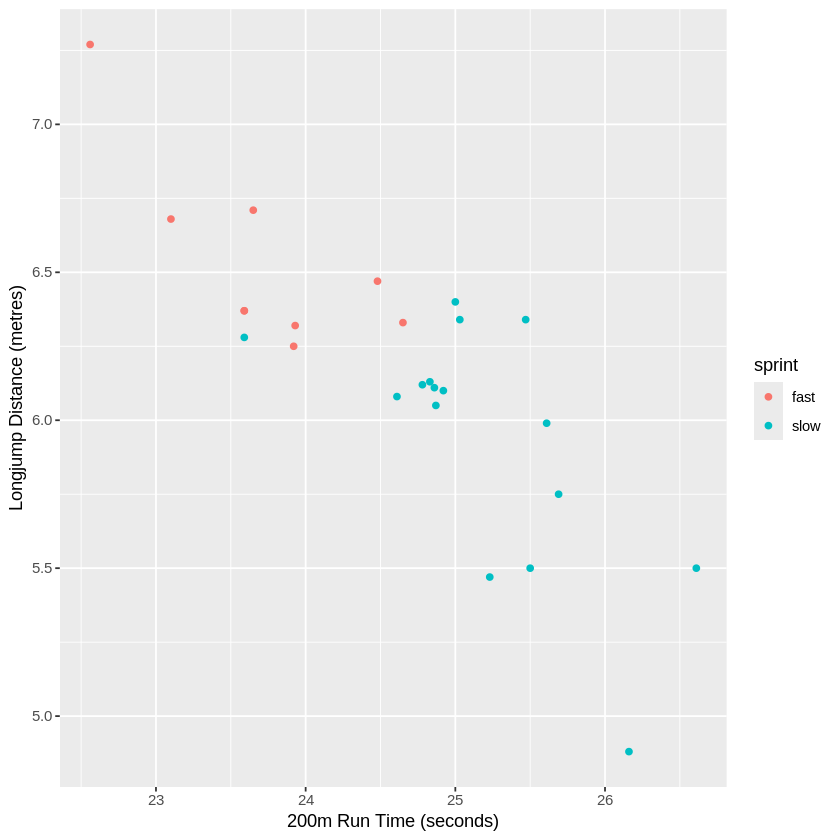

In [ ]:
# Making a scatter plot between *run200m* (x-axis) and *longjump* (y-axis) now with the data points color-coded using *sprint*. What do you observe from this plot?
p2 = ggplot(data = heptathlon) +
  geom_point(aes(x = run200m, y = longjump, color = sprint)) +
  labs(x = '200m Run Time (seconds)', y = 'Longjump Distance (metres)')+
  My_Theme
p2

In [ ]:
round(cor(heptathlon %>% select(-c(score, sprint))), 2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
hurdles,1.00,-0.81,-0.65,0.77,-0.91,-0.01,0.78
highjump,-0.81,1.00,0.44,-0.49,0.78,0.00,-0.59
shot,-0.65,0.44,1.00,-0.68,0.74,0.27,-0.42
run200m,0.77,-0.49,-0.68,1.00,-0.82,-0.33,0.62
longjump,-0.91,0.78,0.74,-0.82,1.00,0.07,-0.70
javelin,-0.01,0.00,0.27,-0.33,0.07,1.00,0.02
run800m,0.78,-0.59,-0.42,0.62,-0.70,0.02,1.00


In [ ]:
# Fit a linear model for approximating *score* as a function of *sprint*. Print the model's summary. How accurate is the model? How do the slow athletes' scores compare to the fast ones?
model1 = lm(data = heptathlon, score ~ sprint)
summary(model1)


Call:
lm(formula = score ~ sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1240.81  -244.11   -55.11   301.89   695.89 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6595.1      142.0   46.43  < 2e-16 ***
sprintslow    -788.3      177.6   -4.44 0.000188 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 426.1 on 23 degrees of freedom
Multiple R-squared:  0.4615,	Adjusted R-squared:  0.4381 
F-statistic: 19.71 on 1 and 23 DF,  p-value: 0.0001881


In [ ]:
model2 = lm(data = heptathlon, score ~ shot + sprint)
summary(model2)


Call:
lm(formula = score ~ shot + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1094.87  -140.19    51.08   120.99   523.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3181.2      885.6   3.592 0.001621 ** 
shot           237.1       61.0   3.886 0.000796 ***
sprintslow    -312.9      185.8  -1.684 0.106261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 335.5 on 22 degrees of freedom
Multiple R-squared:  0.6807,	Adjusted R-squared:  0.6517 
F-statistic: 23.45 on 2 and 22 DF,  p-value: 3.518e-06


### Is there a realtionship between score and sprint slow?

A predictor is significant implies that the `p-value` is smaller than the false-positive rate threshold. The predictor has the linear relationship with the response.

We see that "Shot" is a sognificant predictor.

We see that `sprintslow` is an insignificant feature.

(Ususally, the p-value of last reference level will always be bigger. the reason is that the last level is intuitively informative.)

Therefore, we should not conclude based on p-value.

### For a 1 metre increase in shot put throw and with the same sprint performance, we can say with 95% confidence that the athlete's score will increase/decrease by an amount in the interval [?, ?].

In [ ]:
summary(model2)


Call:
lm(formula = score ~ shot + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1094.87  -140.19    51.08   120.99   523.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3181.2      885.6   3.592 0.001621 ** 
shot           237.1       61.0   3.886 0.000796 ***
sprintslow    -312.9      185.8  -1.684 0.106261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 335.5 on 22 degrees of freedom
Multiple R-squared:  0.6807,	Adjusted R-squared:  0.6517 
F-statistic: 23.45 on 2 and 22 DF,  p-value: 3.518e-06


#### How good is B1hat approximating the population parameter B1?

The bigger the standard error/ std. dev the bigger the p-value.

### CI:

- `[B1hat - 1.96 * SE(B1hat), B1hat + 1.96 * SE(B1hat)]`

In [ ]:
237.1 - 1.96 * 61
237.1 + 1.96 * 61

[1] 117.54

[1] 356.66

We have 95% confidence that the true population paramerte B1 is in this interval [117.54 , 356.66].

----

# For 99% CI:

- `[B1hat - 2.6 * SE(B1hat), B1hat + 2.6 * SE(B1hat)]`



In [ ]:
237.1 - 2.6 * 61
237.1 + 2.6 * 61

[1] 78.5

[1] 395.7

In [ ]:
# For a 1 metre increase in shot put throw and with the same sprint performance, we can say with 95% confidence that the athlete's score will increase/decrease by an amount in the interval [?, ?].
# [B1hat - 1.96 * SE(B1hat), B1hat + 1.96 * SE(B1hat)]
237.1 - 1.96 * 61
237.1 + 1.96 * 61

[1] 117.54

[1] 356.66

What is the interpretation of B1hat (the coefficient estimate for shot?)

`ScoreHatOld = B0hat + B1hat * shot + B2hat * sprintslow`

`ScoreHatNew = B0hat + B1hat * (shot + 1) + B2hat * sprintslow`

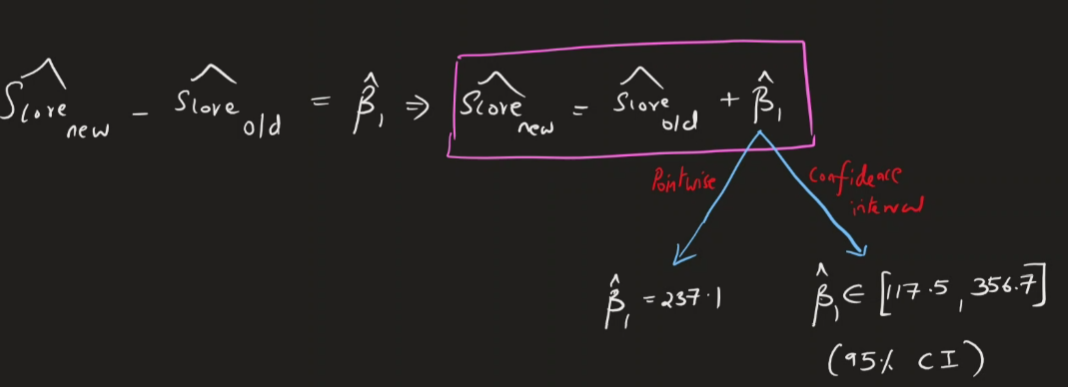

If we were to incraease the corresponding predictor by 1, then if `B1hat` is `positive` it will increase and vice-versa.

We can see the score between 117.54 and 356.66.

### Using the model built above, extract the slope and intercept for estimating the *score* of *slow* and *fast* athletes.

Scorehat = B0hat + B1hat * Shot + B2hat * sprintslow

- ScorehatFast = B0hat + B1hat * Shot + B2hat * 0 = B0hat + B1hat * Shot

- ScorehatSlow = B0hat + B1hat * Shot + B2hat * 1 = B0hat + B1hat * Shot + B2hat

In [ ]:
summary(model2)


Call:
lm(formula = score ~ shot + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1094.87  -140.19    51.08   120.99   523.54 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3181.2      885.6   3.592 0.001621 ** 
shot           237.1       61.0   3.886 0.000796 ***
sprintslow    -312.9      185.8  -1.684 0.106261    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 335.5 on 22 degrees of freedom
Multiple R-squared:  0.6807,	Adjusted R-squared:  0.6517 
F-statistic: 23.45 on 2 and 22 DF,  p-value: 3.518e-06


In [ ]:
# pulling out the coefficeint
coef(model2)

(Intercept)        shot  sprintslow 
  3181.2413    237.0560   -312.8861

In [ ]:
coef(model2)['shot']

shot 
237.056

In [ ]:
coef(model2)[2]

shot 
237.056

In [ ]:
coef(model2)['sprintslow']

sprintslow 
 -312.8861

In [ ]:
coef(model2)[3]

sprintslow 
 -312.8861

In [ ]:
intercept_slow = coef(model2)['(Intercept)'] + coef(model2)['sprintslow']
slop_slow = coef(model2)['shot']

In [ ]:
slop_slow

shot 
237.056

In [ ]:
intercept_slow

(Intercept) 
   2868.355

# Fitting a linear model for approximating *score* as a function of *shot*, *sprint*, and *javelin*. Print the model's summary.

In [ ]:
model3 = lm(data = heptathlon, score ~ shot + javelin + sprint)
summary(model3)


Call:
lm(formula = score ~ shot + javelin + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1109.61  -142.56    52.86   121.09   505.77 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 3087.781   1185.608   2.604  0.01656 * 
shot         236.053     62.952   3.750  0.00118 **
javelin        2.527     20.671   0.122  0.90388   
sprintslow  -310.056    191.476  -1.619  0.12031   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 343.3 on 21 degrees of freedom
Multiple R-squared:  0.6809,	Adjusted R-squared:  0.6353 
F-statistic: 14.94 on 3 and 21 DF,  p-value: 1.969e-05


Javilien here is seen as an insignificant predictor as our adjusted R-squared decreases and with high p-value (in the presense of shot and sprintslow).

By no means we can say that javelin is a bad predictor.

In [ ]:
model4 = lm(data = heptathlon, score ~ shot + highjump + sprint)
summary(model4)


Call:
lm(formula = score ~ shot + highjump + sprint, data = heptathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.29 -115.71  -28.02  126.74  407.36 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2396.54     908.06  -2.639  0.01534 *  
shot          136.06      36.12   3.767  0.00113 ** 
highjump     3892.36     536.22   7.259 3.77e-07 ***
sprintslow   -365.41     101.76  -3.591  0.00172 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 183.3 on 21 degrees of freedom
Multiple R-squared:  0.909,	Adjusted R-squared:  0.896 
F-statistic: 69.93 on 3 and 21 DF,  p-value: 4.255e-11


Here, the model performace is superior.